In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Load Data
df = pd.read_csv('WineQT.csv')
print("Data Loaded Successfully")

Data Loaded Successfully


Count of Good (1) vs Bad (0) wines:
quality_bin
1    621
0    522
Name: count, dtype: int64


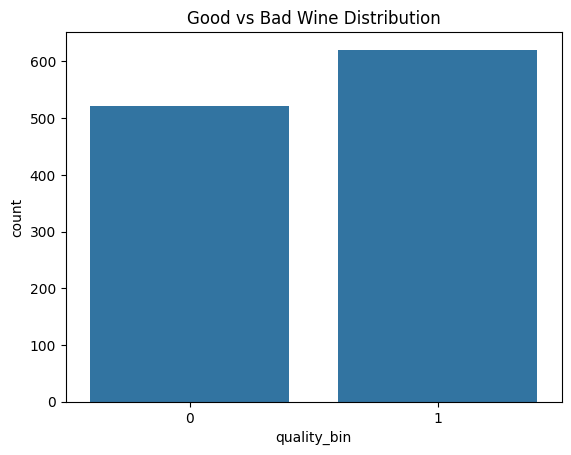

In [2]:
# Create a new column 'quality_bin'
# Lambda function logic: If quality >= 6, write 1. Otherwise, write 0.
df['quality_bin'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Check the counts (Imbalanced or Balanced?)
print("Count of Good (1) vs Bad (0) wines:")
print(df['quality_bin'].value_counts())

# Visualize the split
sns.countplot(x='quality_bin', data=df)
plt.title('Good vs Bad Wine Distribution')
plt.show()

In [3]:
#dropping quality,quality_bin and ID
X = df.drop(['quality', 'quality_bin', 'Id'], axis=1)

#target new binary cloumn
y = df['quality_bin']

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")

Training Data Shape: (914, 11)


In [4]:
#trsin
# max_iter=1000 gives more time to find best solution
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#predict
predictions = model.predict(X_test)

#F1 score
f1 = f1_score(y_test, predictions)

#results
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy_score(y_test, predictions)*100:.2f}%")

#confision matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

F1 Score: 0.7905
Accuracy: 76.86%

Confusion Matrix:
[[ 76  26]
 [ 27 100]]
